In [1]:
"""
author：算法进阶
https://github.com/aialgorithm/Blog
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 导入股票数据，选取股票开盘价序列数据
dataset_train = pd.read_csv('../../../../BitBucket/stock_exploration/originalData/20210817/300002.csv')
dataset_train = dataset_train.sort_values(by='Date').reset_index(drop=True)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.shape)
dataset_train.head()

(152, 7)


,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,5.15,5.05,5.11,5.08,34690661,5.08
1,2021-01-05,5.12,4.98,5.08,5.02,36005214,5.02
2,2021-01-06,5.08,4.89,5.06,4.93,30251660,4.93
3,2021-01-07,4.94,4.55,4.93,4.73,52366823,4.73
4,2021-01-08,5.03,4.61,4.70,4.81,49958645,4.81


In [3]:
## 开盘价
training_set

array([[5.1500001 ],
       [5.11999989],
       [5.07999992],
       [4.94000006],
       [5.03000021],
       [4.92999983],
       [4.84000015],
       [4.65999985],
       [4.51000023],
       [4.6500001 ],
       [4.65999985],
       [4.80000019],
       [4.71999979],
       [4.78000021],
       [4.63000011],
       [4.5       ],
       [4.44000006],
       [4.6500001 ],
       [4.71000004],
       [4.69999981],
       [4.48000002],
       [4.67999983],
       [4.61999989],
       [4.4000001 ],
       [4.3499999 ],
       [4.17999983],
       [4.1500001 ],
       [4.19000006],
       [4.44000006],
       [4.5999999 ],
       [4.84000015],
       [4.75      ],
       [4.67000008],
       [4.63000011],
       [4.61000013],
       [4.63999987],
       [4.67999983],
       [4.5999999 ],
       [4.6500001 ],
       [4.73999977],
       [4.92999983],
       [5.03999996],
       [4.82000017],
       [4.67999983],
       [4.65999985],
       [4.53000021],
       [5.05999994],
       [4.960

In [4]:
# 对训练数据max-min归一化，加速网络收敛
# max-min离差标准化帮助我们转化不同比例上的数据，消除特殊特征的主导。并且它不需要对数据的分布进行假设（比如k近邻和人工神经网络）。但是，归一化（离差标准化）不能很好地处理异常值。相反，标准化（中心标准化）可以更好地处理异常值，以及加速诸如梯度下降等算法的收敛。所以我们通常选择中心标准化。
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# sc = StandardScaler()
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
## 标准化后的开盘价
training_set_scaled

array([[0.5       ],
       [0.4849999 ],
       [0.46499991],
       [0.39499998],
       [0.44000006],
       [0.38999987],
       [0.34500003],
       [0.25499988],
       [0.18000007],
       [0.25      ],
       [0.25499988],
       [0.32500005],
       [0.28499985],
       [0.31500006],
       [0.24000001],
       [0.17499995],
       [0.14499998],
       [0.25      ],
       [0.27999997],
       [0.27499986],
       [0.16499996],
       [0.26499987],
       [0.2349999 ],
       [0.125     ],
       [0.0999999 ],
       [0.01499987],
       [0.        ],
       [0.01999998],
       [0.14499998],
       [0.2249999 ],
       [0.34500003],
       [0.29999995],
       [0.25999999],
       [0.24000001],
       [0.23000002],
       [0.24499989],
       [0.26499987],
       [0.2249999 ],
       [0.25      ],
       [0.29499984],
       [0.38999987],
       [0.44499993],
       [0.33500004],
       [0.26499987],
       [0.25499988],
       [0.19000006],
       [0.45499992],
       [0.404

In [6]:
# 数据整理为样本及标签：60 timesteps and 1 output
# 每条样本含60个时间步，对应下一时间步作为标签值
X_train = []
y_train = []
for i in range(60, 152):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(92, 60)
(92,)


In [7]:
X_train

array([[0.5       , 0.4849999 , 0.46499991, ..., 0.28499985, 0.26999998,
        0.2349999 ],
       [0.4849999 , 0.46499991, 0.39499998, ..., 0.26999998, 0.2349999 ,
        0.30999994],
       [0.46499991, 0.39499998, 0.44000006, ..., 0.2349999 , 0.30999994,
        0.27999997],
       ...,
       [0.16499996, 0.13999987, 0.15499997, ..., 0.75499988, 0.75499988,
        1.        ],
       [0.13999987, 0.15499997, 0.18499994, ..., 0.75499988, 1.        ,
        0.83999991],
       [0.15499997, 0.18499994, 0.21000004, ..., 1.        , 0.83999991,
        0.69499993]])

In [8]:
y_train

array([0.30999994, 0.27999997, 0.2349999 , 0.21000004, 0.18499994,
       0.15499997, 0.14999986, 0.13499999, 0.19499993, 0.21499991,
       0.37999988, 0.32500005, 0.32999992, 0.30999994, 0.27999997,
       0.25499988, 0.2249999 , 0.21499991, 0.19000006, 0.19499993,
       0.16999984, 0.18000007, 0.19000006, 0.21000004, 0.24499989,
       0.26499987, 0.26499987, 0.22000003, 0.21000004, 0.16499996,
       0.13999987, 0.15499997, 0.18499994, 0.21000004, 0.2249999 ,
       0.25999999, 0.24000001, 0.2349999 , 0.23000002, 0.24499989,
       0.44499993, 0.29999995, 0.38499999, 0.375     , 0.43000007,
       0.59500003, 0.5999999 , 0.59500003, 0.51999998, 0.4749999 ,
       0.53999996, 0.50999999, 0.46000004, 0.42499995, 0.36500001,
       0.35500002, 0.41499996, 0.38499999, 0.3599999 , 0.27499986,
       0.34500003, 0.3499999 , 0.40499997, 0.33999991, 0.36999989,
       0.45499992, 0.46499991, 0.44000006, 0.40499997, 0.37999988,
       0.41499996, 0.44499993, 0.45499992, 0.49499989, 0.46499

In [9]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(92, 60, 1)


In [10]:
X_train

array([[[0.5       ],
        [0.4849999 ],
        [0.46499991],
        ...,
        [0.28499985],
        [0.26999998],
        [0.2349999 ]],

       [[0.4849999 ],
        [0.46499991],
        [0.39499998],
        ...,
        [0.26999998],
        [0.2349999 ],
        [0.30999994]],

       [[0.46499991],
        [0.39499998],
        [0.44000006],
        ...,
        [0.2349999 ],
        [0.30999994],
        [0.27999997]],

       ...,

       [[0.16499996],
        [0.13999987],
        [0.15499997],
        ...,
        [0.75499988],
        [0.75499988],
        [1.        ]],

       [[0.13999987],
        [0.15499997],
        [0.18499994],
        ...,
        [0.75499988],
        [1.        ],
        [0.83999991]],

       [[0.15499997],
        [0.18499994],
        [0.21000004],
        ...,
        [1.        ],
        [0.83999991],
        [0.69499993]]])

In [11]:
#  利用Keras创建RNN模型


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,LSTM
from keras.layers import Dropout


# 初始化顺序模型
regressor = Sequential()


# 定义输入层及带5个神经元的隐藏层
## 这里的input_shape是(60, 1)
regressor.add(SimpleRNN(units = 5,input_shape = (X_train.shape[1], 1)))

# regressor.add(SimpleRNN(units = 50,return_sequences=True,input_shape = (X_train.shape[1], 1)))  # 这样可以定义一个2*隐藏层的RNN
# regressor.add(SimpleRNN(units = 5))

# regressor.add(LSTM(units = 5,input_shape = (X_train.shape[1], 1)))   # 这样可以定义一个的LSTM
# 定义线性的输出层
regressor.add(Dense(units = 1))

# 模型编译：定义优化算法adam， 目标函数均方根MSE
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 模型训练
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 100, validation_split=0.3, verbose=0)

regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


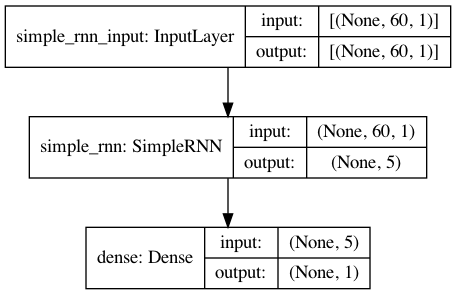

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(regressor, show_shapes=True)

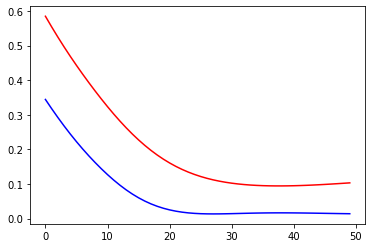

In [13]:

# 模型评估：拟合效果
plt.plot(history.history['loss'],c='blue')    # 蓝色线训练集损失
plt.plot(history.history['val_loss'],c='red') # 红色线验证集损失
plt.show()

In [29]:
# 评估模型测试集效果

# 测试数据
dataset_test = pd.read_csv('../../../../BitBucket/stock_exploration/originalData/20210817/300002.csv')
dataset_test = dataset_test.sort_values(by='Date').reset_index(drop=True)


In [30]:
dataset_test

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,5.15,5.05,5.11,5.08,34690661,5.08
1,2021-01-05,5.12,4.98,5.08,5.02,36005214,5.02
2,2021-01-06,5.08,4.89,5.06,4.93,30251660,4.93
3,2021-01-07,4.94,4.55,4.93,4.73,52366823,4.73
4,2021-01-08,5.03,4.61,4.70,4.81,49958645,4.81
...,...,...,...,...,...,...,...
147,2021-08-11,5.66,5.51,5.55,5.52,75053194,5.52
148,2021-08-12,6.15,5.53,5.55,5.81,190118060,5.81
149,2021-08-13,5.83,5.56,5.79,5.58,101540589,5.58
150,2021-08-16,5.54,5.33,5.51,5.36,86862209,5.36


In [31]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [32]:
real_stock_price

array([[5.1500001 ],
       [5.11999989],
       [5.07999992],
       [4.94000006],
       [5.03000021],
       [4.92999983],
       [4.84000015],
       [4.65999985],
       [4.51000023],
       [4.6500001 ],
       [4.65999985],
       [4.80000019],
       [4.71999979],
       [4.78000021],
       [4.63000011],
       [4.5       ],
       [4.44000006],
       [4.6500001 ],
       [4.71000004],
       [4.69999981],
       [4.48000002],
       [4.67999983],
       [4.61999989],
       [4.4000001 ],
       [4.3499999 ],
       [4.17999983],
       [4.1500001 ],
       [4.19000006],
       [4.44000006],
       [4.5999999 ],
       [4.84000015],
       [4.75      ],
       [4.67000008],
       [4.63000011],
       [4.61000013],
       [4.63999987],
       [4.67999983],
       [4.5999999 ],
       [4.6500001 ],
       [4.73999977],
       [4.92999983],
       [5.03999996],
       [4.82000017],
       [4.67999983],
       [4.65999985],
       [4.53000021],
       [5.05999994],
       [4.960

In [33]:
dataset_train['Open'].shape

(152,)

In [34]:
dataset_test['Open']

0      5.11
1      5.08
2      5.06
3      4.93
4      4.70
       ... 
147    5.55
148    5.55
149    5.79
150    5.51
151    5.42
Name: Open, Length: 152, dtype: float64

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [36]:
len(dataset_total)

304

In [37]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [38]:
inputs

array([4.46999979, 4.48999977, 4.48999977, 4.57999992, 4.53999996,
       4.55999994, 4.59000015, 4.53999996, 4.73999977, 4.61000013,
       4.71999979, 4.88000011, 4.82000017, 4.90999985, 5.07999992,
       5.09000015, 5.0999999 , 5.05999994, 4.98999977, 5.15999985,
       4.94999981, 4.98000002, 4.82999992, 4.78999996, 4.80999994,
       4.86999989, 4.82999992, 4.61999989, 4.63999987, 4.75      ,
       4.76000023, 4.82999992, 4.67999983, 4.78999996, 5.01000023,
       5.01000023, 4.94999981, 4.80000019, 4.82000017, 4.92999983,
       4.92999983, 4.98000002, 5.05000019, 4.9000001 , 4.78000021,
       4.71000004, 4.5       , 4.48000002, 4.53000021, 4.6500001 ,
       5.53000021, 5.61000013, 5.76999998, 5.67999983, 5.61999989,
       5.55000019, 5.55000019, 5.78999996, 5.51000023, 5.42000008,
       5.11000013, 5.07999992, 5.05999994, 4.92999983, 4.69999981,
       4.86000013, 4.63000011, 4.61999989, 4.38999987, 4.40999985,
       4.55000019, 4.53000021, 4.69000006, 4.63000011, 4.61999

In [39]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [40]:
# 提取测试集
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [44]:
predicted_stock_price.shape

(16, 1)

In [45]:
real_stock_price.shape

(152, 1)

In [41]:
# 模型预测
predicted_stock_price = regressor.predict(X_test)
# 逆归一化
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# 模型评估
print('预测与实际差异MSE',sum(pow((predicted_stock_price - real_stock_price),2))/predicted_stock_price.shape[0])
print('预测与实际差异MAE',sum(abs(predicted_stock_price - real_stock_price))/predicted_stock_price.shape[0])

ValueError: operands could not be broadcast together with shapes (16,1) (152,1) 

In [42]:
dataset_test.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-04,5.15,5.05,5.11,5.08,34690661,5.08
1,2021-01-05,5.12,4.98,5.08,5.02,36005214,5.02
2,2021-01-06,5.08,4.89,5.06,4.93,30251660,4.93
3,2021-01-07,4.94,4.55,4.93,4.73,52366823,4.73
4,2021-01-08,5.03,4.61,4.70,4.81,49958645,4.81


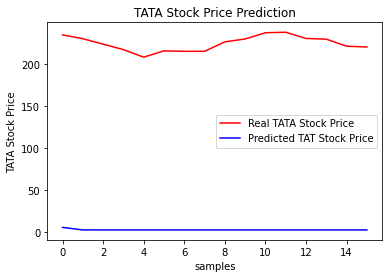

In [28]:
# 预测与实际差异的可视化
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('samples')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()